In [1]:
# import packages 
import numpy as np 

import h5py
import os
import re

import pickle

import skimage

import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches
import matplotlib as mpl
import matplotlib.cm as mpl_cm
import matplotlib.colors as mpl_colors
import matplotlib.offsetbox as mpl_offsetbox
import matplotlib.gridspec as mpl_gridspec

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# change font
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "Arial"
mpl.rcParams.update({'font.size': 8})

print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.sans-serif'])
print(mpl.rcParams['font.size'])

['Arial']
['Arial']
8.0


In [2]:
# Save progress 
HISTORY_FILEPATH = r"\\10.254.8.27\jilab2\Jian\BackUp\JupyterNotebookRemoteBackup\ExampleImageFOVPlotVer03.py"
LAST_SAVE_TIME = 0
SAVE_INTERVAL_S = 5*60
def SAVE_PROGRESS(dst_file_path):
    global LAST_SAVE_TIME, SAVE_INTERVAL_S
    import time
    cur_time = time.time()
    if (cur_time - LAST_SAVE_TIME) < SAVE_INTERVAL_S:
        print(f"Time since last sync = {(cur_time - LAST_SAVE_TIME):0.2f} s" )
        return
    LAST_SAVE_TIME = cur_time
    try:
        from datetime import datetime
        dst_dir_path, dst_file_name = os.path.split(dst_file_path)
        dst_file_name = os.path.splitext(dst_file_name)[0] + "_" + datetime.today().strftime('%Y-%m-%d') + os.path.splitext(dst_file_name)[1]
        dst_file_path = os.path.join(dst_dir_path, dst_file_name)
        if not os.path.isdir(dst_dir_path):
            os.makedirs(dst_dir_path)
        if os.path.exists(dst_file_path):
            os.remove(dst_file_path)
        %history -t -g -f $dst_file_path
        dst_notebook_path = os.path.splitext(dst_file_path)[0] + ".ipynb"
        %notebook $dst_notebook_path
        print("Progress saved to: " + dst_file_path)
    except Exception as e:
        print("Progress sync failed, error: ",e)

In [3]:
# display configuration

my_monitor_dpi_px = 96
illustrator_mointor_dpi_px = 72
letter_paper_size_inch = np.array((8.5, 11))

full_page_figure_illustrator_size_pxls = np.array([521, 655])
full_page_paper_illustrator_size_pxls = np.array([620, 801])
paper_to_illustrator_ratio = full_page_figure_illustrator_size_pxls/full_page_paper_illustrator_size_pxls

plot_panel_label_font_size = 8
plot_axis_label_font_size = 7
plot_numeric_label_font_size = 6.5

SAVE_PROGRESS(HISTORY_FILEPATH)

Progress saved to: \\10.254.8.27\jilab2\Jian\BackUp\JupyterNotebookRemoteBackup\ExampleImageFOVPlotVer03_2024-03-01.py


In [4]:
image_xy_pxl_size_um = np.array([0.8, 0.8])

SAVE_PROGRESS(HISTORY_FILEPATH)

Time since last sync = 14.43 s


In [6]:
# source and dstination configuration

# src_tif_file_path = r"J:\2023-10-10\M377_JEDI2P\FOV03\Group01\Olympus25X_M377_JEDI2P_FOV03_Group01_TS_CH0_CHA_F0_Pkg\MotionReg\avg_motion_reg_IllumNorm_Gamma0p5.tif"
# src_volpy_res_hdf5_file_path = r"J:\2023-10-10\M377_JEDI2P\FOV03\Group01\Olympus25X_M377_JEDI2P_FOV03_Group01_TS_CH0_CHA_F0_Pkg\VolpyResults_Ver01\results.hdf5"

src_tif_file_path = r"M:\2023-05-11\M347\FOV02\Group01\Olympus25X_M347_FOV02_Group01_TS_CH0_CHA_F0_Pkg\MotionReg\avg_motion_reg_IllumNorm_Gamma0p5.tif"
src_volpy_res_hdf5_file_path = r"M:\2023-05-11\M347\FOV02\Group01\Olympus25X_M347_FOV02_Group01_TS_CH0_CHA_F0_Pkg\VolpyResults_Ver01p6_NewMasNewkMC_STD5\results.hdf5"

dst_dir_path = os.path.split(src_tif_file_path)[0]
dst_plot_subdir_name = "figures"

SAVE_PROGRESS(HISTORY_FILEPATH)

Time since last sync = 21.49 s


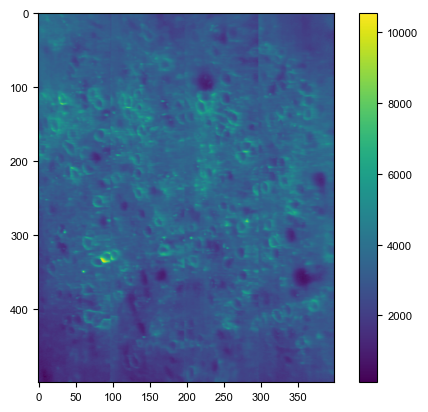

Time since last sync = 24.60 s


In [7]:
# load data 

src_image = skimage.io.imread(src_tif_file_path)

plt.figure()
plt.imshow(src_image)
plt.colorbar()
plt.show()

SAVE_PROGRESS(HISTORY_FILEPATH)

In [8]:
# import roi masks

roi_regex = r"roi\d+"
volpyest_weight_key = "roi{roi_idx}\\volpy_estimates\\weights"
volpyest_context_coord = "roi{roi_idx}\\volpy_estimates\\context_coord"

volpyest_weights = None
volpyest_context_coords = None


nof_rois = 0
with h5py.File(src_volpy_res_hdf5_file_path, "r") as hdf5_file:
    max_roi_num = 0
    for key in hdf5_file.keys():
        for istr in re.findall(roi_regex, key):
            cur_roi_num = int(istr[3:])
            max_roi_num = max(max_roi_num, cur_roi_num)
        nof_rois = max_roi_num + 1

    # print(hdf5_file.keys())
    
    preview_volpy_weights = hdf5_file[volpyest_weight_key.format(roi_idx = 0)][()]
    preview_volpy_context_coord = hdf5_file[volpyest_context_coord.format(roi_idx = 0)][()]

    volpyest_weights = np.zeros((nof_rois,) + preview_volpy_weights.shape, dtype = float)
    volpyest_context_coords = np.zeros((nof_rois,) + preview_volpy_context_coord.shape, dtype = float)

    for i_roi in range(nof_rois):
        volpyest_weights[i_roi, :, :] = hdf5_file[volpyest_weight_key.format(roi_idx = i_roi)][()]
        volpyest_context_coords[i_roi, :, :] = hdf5_file[volpyest_context_coord.format(roi_idx = i_roi)][()]
    
SAVE_PROGRESS(HISTORY_FILEPATH)

Time since last sync = 30.31 s


[[105. 231.]
 [127. 250.]]


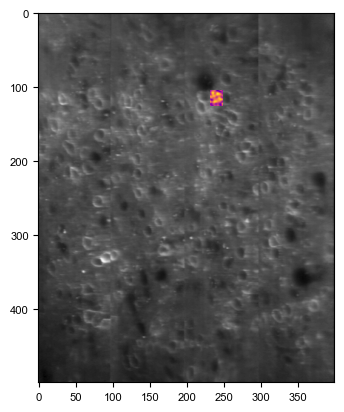

In [102]:
# check mask and coordinate loading result

check_roi_idx = 154
check_weight = volpyest_weights[check_roi_idx,:,:]
check_context_coord = volpyest_context_coords[check_roi_idx, :, :]
print(check_context_coord)

check_weight = check_weight.copy()
check_weight[check_weight == 0] = np.nan

plt.figure()
plt.imshow(src_image, cmap = "gray")
plt.imshow(check_weight, cmap = "plasma")
# plt.plot(check_context_coord[:,1], check_context_coord[:,0], color = "red")
plt.show()

In [103]:
dst_plot_subdir_path = os.path.join(dst_dir_path, dst_plot_subdir_name)

if not os.path.isdir(dst_plot_subdir_path):
    os.makedirs(dst_plot_subdir_path)

print(dst_plot_subdir_path)

SAVE_PROGRESS(HISTORY_FILEPATH)

M:\2023-05-11\M347\FOV02\Group01\Olympus25X_M347_FOV02_Group01_TS_CH0_CHA_F0_Pkg\MotionReg\figures
Progress saved to: \\10.254.8.27\jilab2\Jian\BackUp\JupyterNotebookRemoteBackup\ExampleImageFOVPlotVer03_2024-03-01.py


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


plot saved to: M:\2023-05-11\M347\FOV02\Group01\Olympus25X_M347_FOV02_Group01_TS_CH0_CHA_F0_Pkg\MotionReg\figures\example_image_fov_ver01.pdf
pickle dump to: M:\2023-05-11\M347\FOV02\Group01\Olympus25X_M347_FOV02_Group01_TS_CH0_CHA_F0_Pkg\MotionReg\figures\example_image_fov_ver01.pickle
data saved to: M:\2023-05-11\M347\FOV02\Group01\Olympus25X_M347_FOV02_Group01_TS_CH0_CHA_F0_Pkg\MotionReg\figures\example_image_fov_ver01.hdf5


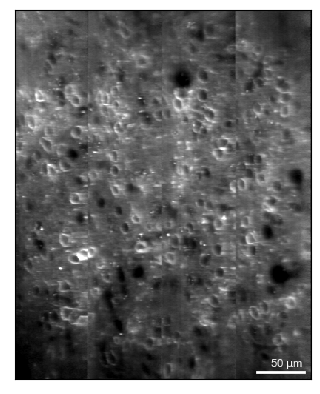

Time since last sync = 104.02 s


In [106]:
# make nice plot

plot_image = src_image
plot_cmap = "gray"
# plot_vmin = 1185
# plot_vmax = 3785

plot_vmin = 1285
plot_vmax = 7040

plot_scale_bar_len_um = 50
plot_scale_bar_len_pxls = plot_scale_bar_len_um/image_xy_pxl_size_um[0]
plot_scale_bar_right_offset_pxls = -10
plot_scale_bar_y_offset_pxls = -10

plot_scale_bar_xs = np.array([0, plot_scale_bar_len_pxls])
plot_scale_bar_xs = plot_image.shape[1] - plot_scale_bar_len_pxls + plot_scale_bar_right_offset_pxls + plot_scale_bar_xs
plot_scale_bar_ys = plot_scale_bar_right_offset_pxls * np.ones(plot_scale_bar_xs.shape)
plot_scale_bar_ys = plot_image.shape[0] + plot_scale_bar_ys

dst_figure_name = f"example_image_fov_ver01"

dst_png_figure_path = os.path.join(dst_plot_subdir_path, dst_figure_name + ".png")
dst_eps_figure_path = os.path.join(dst_plot_subdir_path, dst_figure_name + ".eps")
dst_pdf_figure_path = os.path.join(dst_plot_subdir_path, dst_figure_name + ".pdf")
dst_pkl_figure_path = os.path.join(dst_plot_subdir_path, dst_figure_name + ".pickle")
dst_hdf5_figure_path = os.path.join(dst_plot_subdir_path, dst_figure_name + ".hdf5")
dst_notebook_path = os.path.join(dst_plot_subdir_path, dst_figure_name + ".ipynb")


fig = plt.figure()
plot_ax = plt.gca()
plt.imshow(
    plot_image,
    interpolation = "none",
    cmap = plot_cmap,
    vmin = plot_vmin,
    vmax = plot_vmax,
)
plt.plot(plot_scale_bar_xs, 
         plot_scale_bar_ys,
         color = "white",
         linewidth = 2)
plot_ax.axes.get_xaxis().set_ticks([])
plot_ax.axes.get_yaxis().set_ticks([])
plt.text(x =plot_scale_bar_xs[-1],
         y = plot_scale_bar_ys[-1] - 2,
         s = f"{plot_scale_bar_len_um}" + r" $\mathrm{\mu}$m",
         color = "white",
         horizontalalignment='right',
         verticalalignment='bottom',
         # fontweight = "bold",
         fontname = "Arial",
)

fig.savefig(dst_png_figure_path, format = "png", bbox_inches = 'tight')
fig.savefig(dst_eps_figure_path, format = "eps", bbox_inches = 'tight')
fig.savefig(dst_pdf_figure_path, format = "pdf", bbox_inches = 'tight')

with open(dst_pkl_figure_path, "wb") as dst_pkl_file:
    pickle.dump(fig, dst_pkl_file)

with h5py.File(dst_hdf5_figure_path, "w") as hdf5_file:
    hdf5_file.create_dataset("plot_image", data = plot_image)
    hdf5_file.create_dataset("plot_cmap", data = plot_cmap)
    hdf5_file.create_dataset("plot_vmin", data = plot_vmin)
    hdf5_file.create_dataset("plot_vmax", data = plot_vmax)
    hdf5_file.create_dataset("plot_scale_bar_len_um", data = plot_scale_bar_len_um)
    hdf5_file.create_dataset("plot_scale_bar_len_pxls", data = plot_scale_bar_len_pxls)
    hdf5_file.create_dataset("plot_scale_bar_right_offset_pxls", data = plot_scale_bar_right_offset_pxls)
    hdf5_file.create_dataset("plot_scale_bar_y_offset_pxls", data = plot_scale_bar_y_offset_pxls)
    hdf5_file.create_dataset("plot_scale_bar_xs", data = plot_scale_bar_xs)
    hdf5_file.create_dataset("plot_scale_bar_ys", data = plot_scale_bar_ys)
    hdf5_file.create_dataset("image_xy_pxl_size_um", data = image_xy_pxl_size_um)

%notebook $dst_notebook_path
                             
print("plot saved to: " + dst_pdf_figure_path)
print("pickle dump to: " + dst_pkl_figure_path)
print("data saved to: " + dst_hdf5_figure_path)

plt.show()

SAVE_PROGRESS(HISTORY_FILEPATH)

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


plot saved to: M:\2023-05-11\M347\FOV02\Group01\Olympus25X_M347_FOV02_Group01_TS_CH0_CHA_F0_Pkg\MotionReg\figures\example_image_fov_selected_rois.pdf
pickle dump to: M:\2023-05-11\M347\FOV02\Group01\Olympus25X_M347_FOV02_Group01_TS_CH0_CHA_F0_Pkg\MotionReg\figures\example_image_fov_selected_rois.pickle
data saved to: M:\2023-05-11\M347\FOV02\Group01\Olympus25X_M347_FOV02_Group01_TS_CH0_CHA_F0_Pkg\MotionReg\figures\example_image_fov_selected_rois.hdf5


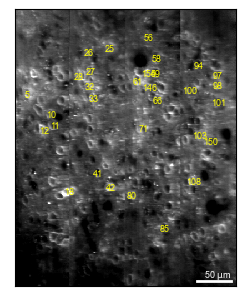

Time since last sync = 68.88 s


In [110]:
# make nice plot

plot_label_roi_idxs = np.array([  5,  10,  11,  12,  18,  25,  26,  27,  28,  32,  33,  41,  42,
        56,  58,  59,  61,  66,  71,  80,  85,  94,  97,  98, 100, 101,
       103, 108, 146, 150, 154])


plot_image = src_image
plot_cmap = "gray"
# plot_vmin = 1185
# plot_vmax = 3785

plot_vmin = 1816
plot_vmax = 7040

plot_context_coords = volpyest_context_coords

plot_roi_text_ij_offset = np.array([0, 25])
plot_roi_text_color = "yellow"

plot_scale_bar_len_um = 50
plot_scale_bar_len_pxls = plot_scale_bar_len_um/image_xy_pxl_size_um[0]
plot_scale_bar_right_offset_pxls = -10
plot_scale_bar_y_offset_pxls = -10

plot_scale_bar_xs = np.array([0, plot_scale_bar_len_pxls])
plot_scale_bar_xs = plot_image.shape[1] - plot_scale_bar_len_pxls + plot_scale_bar_right_offset_pxls + plot_scale_bar_xs
plot_scale_bar_ys = plot_scale_bar_right_offset_pxls * np.ones(plot_scale_bar_xs.shape)
plot_scale_bar_ys = plot_image.shape[0] + plot_scale_bar_ys

dst_figure_name = f"example_image_fov_selected_rois"

dst_png_figure_path = os.path.join(dst_plot_subdir_path, dst_figure_name + ".png")
dst_eps_figure_path = os.path.join(dst_plot_subdir_path, dst_figure_name + ".eps")
dst_pdf_figure_path = os.path.join(dst_plot_subdir_path, dst_figure_name + ".pdf")
dst_pkl_figure_path = os.path.join(dst_plot_subdir_path, dst_figure_name + ".pickle")
dst_hdf5_figure_path = os.path.join(dst_plot_subdir_path, dst_figure_name + ".hdf5")
dst_notebook_path = os.path.join(dst_plot_subdir_path, dst_figure_name + ".ipynb")

plot_label_roi_idxs = np.unique(plot_label_roi_idxs)

fig_width = letter_paper_size_inch[0] * paper_to_illustrator_ratio[0] * (1/2)
fig_height = letter_paper_size_inch[1] * paper_to_illustrator_ratio[1] * (2/5)

fig = plt.figure(figsize = (fig_width,fig_height))
plot_ax = plt.gca()
plt.imshow(
    plot_image,
    interpolation = "none",
    cmap = plot_cmap,
    vmin = plot_vmin,
    vmax = plot_vmax,
)
plt.plot(plot_scale_bar_xs, 
         plot_scale_bar_ys,
         color = "white",
         linewidth = 2)
plot_ax.axes.get_xaxis().set_ticks([])
plot_ax.axes.get_yaxis().set_ticks([])
plt.text(x =plot_scale_bar_xs[-1],
         y = plot_scale_bar_ys[-1],
         s = f"{plot_scale_bar_len_um}" + r" $\mathrm{\mu}$m",
         color = "white",
         horizontalalignment='right',
         verticalalignment='bottom',
         # fontweight = "bold",
         fontname = "Arial",
         fontsize = plot_numeric_label_font_size,
)

for i_roi in range(len(plot_label_roi_idxs)):
    cur_roi_idx = plot_label_roi_idxs[i_roi]
    cur_roi_coords = plot_context_coords[cur_roi_idx, :, :]
    cur_roi_text_ij = np.mean(cur_roi_coords, axis = 0)
    cur_roi_text = f"{cur_roi_idx:d}"
    plt.text(x = cur_roi_text_ij[1],
             y = cur_roi_text_ij[0],
             s = cur_roi_text,
             color = plot_roi_text_color,
             horizontalalignment = "center",
             # verticalalignment = "top",
             verticalalignment = "center",
             fontname = "Arial",
             fontsize = plot_numeric_label_font_size,
            )
             
    

fig.savefig(dst_png_figure_path, format = "png", bbox_inches = 'tight')
fig.savefig(dst_eps_figure_path, format = "eps", bbox_inches = 'tight')
fig.savefig(dst_pdf_figure_path, format = "pdf", bbox_inches = 'tight')

with open(dst_pkl_figure_path, "wb") as dst_pkl_file:
    pickle.dump(fig, dst_pkl_file)

with h5py.File(dst_hdf5_figure_path, "w") as hdf5_file:
    hdf5_file.create_dataset("plot_image", data = plot_image)
    hdf5_file.create_dataset("plot_cmap", data = plot_cmap)
    hdf5_file.create_dataset("plot_vmin", data = plot_vmin)
    hdf5_file.create_dataset("plot_vmax", data = plot_vmax)
    hdf5_file.create_dataset("plot_scale_bar_len_um", data = plot_scale_bar_len_um)
    hdf5_file.create_dataset("plot_scale_bar_len_pxls", data = plot_scale_bar_len_pxls)
    hdf5_file.create_dataset("plot_scale_bar_right_offset_pxls", data = plot_scale_bar_right_offset_pxls)
    hdf5_file.create_dataset("plot_scale_bar_y_offset_pxls", data = plot_scale_bar_y_offset_pxls)
    hdf5_file.create_dataset("plot_scale_bar_xs", data = plot_scale_bar_xs)
    hdf5_file.create_dataset("plot_scale_bar_ys", data = plot_scale_bar_ys)
    hdf5_file.create_dataset("image_xy_pxl_size_um", data = image_xy_pxl_size_um)
    hdf5_file.create_dataset("plot_label_roi_idxs", data = plot_label_roi_idxs)
    hdf5_file.create_dataset("plot_context_coords", data = plot_context_coords)
    hdf5_file.create_dataset("plot_roi_text_ij_offset", data = plot_roi_text_ij_offset) 

%notebook $dst_notebook_path
                             
print("plot saved to: " + dst_pdf_figure_path)
print("pickle dump to: " + dst_pkl_figure_path)
print("data saved to: " + dst_hdf5_figure_path)

plt.show()

SAVE_PROGRESS(HISTORY_FILEPATH)